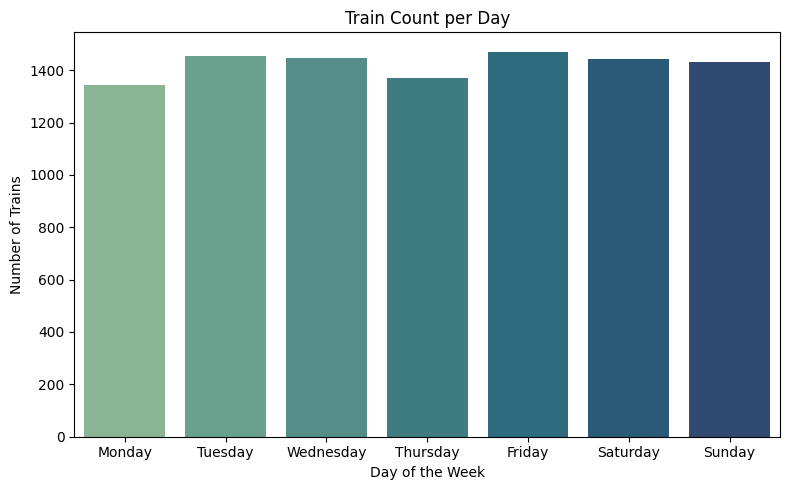

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_excel("Railway_info.csv.xlsx")

# Clean and explode days
df['Days_List'] = df['days'].apply(lambda x: str(x).split())
df_exploded = df.explode('Days_List')
df_exploded['Days_List'] = df_exploded['Days_List'].str.capitalize()

# Count trains per day
day_counts = df_exploded['Days_List'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Plot
plt.figure(figsize=(8,5))
sns.barplot(x=day_counts.index, y=day_counts.values, hue = day_counts.index, palette='crest', legend=False)
plt.title("Train Count per Day")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Trains")
plt.tight_layout()
plt.show()


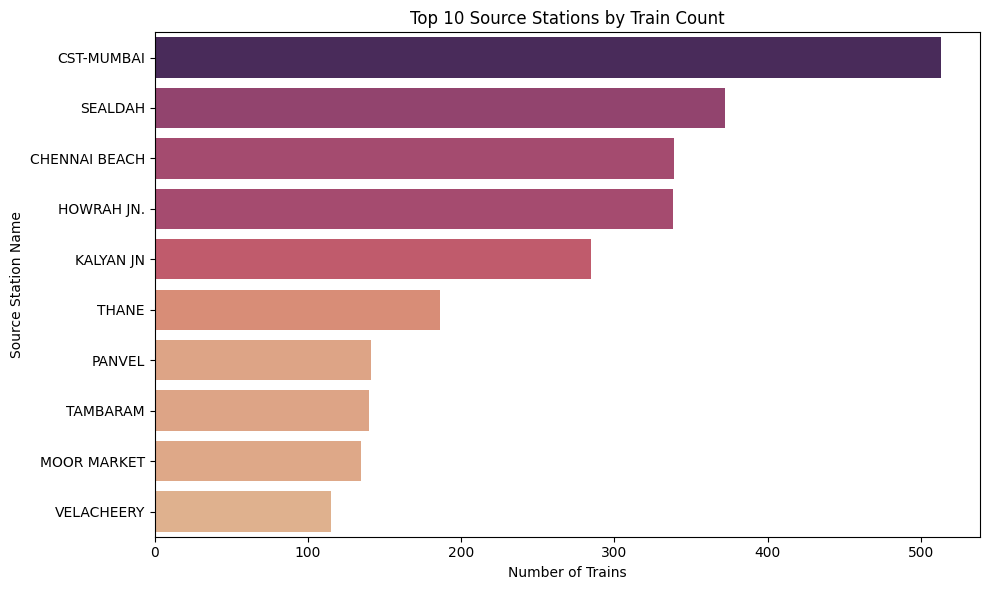

In [3]:
top_sources = df['Source_Station_Name'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_sources.values, y=top_sources.index, hue = top_sources.values, palette="flare", legend=False)
plt.title("Top 10 Source Stations by Train Count")
plt.xlabel("Number of Trains")
plt.ylabel("Source Station Name")
plt.tight_layout()
plt.show()


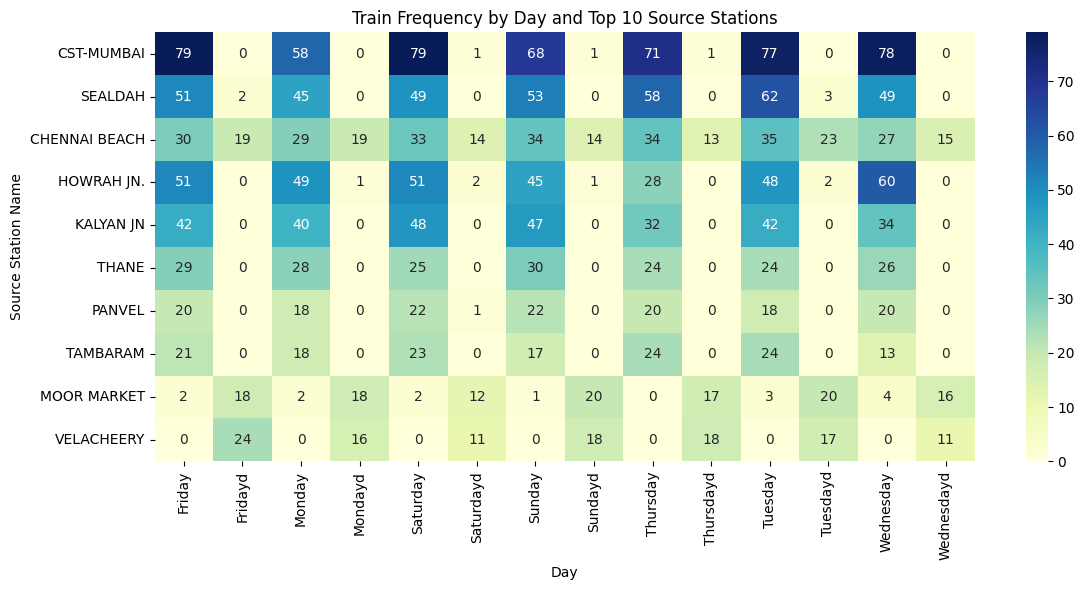

In [4]:
# Create pivot table for heatmap
heatmap_data = df_exploded.groupby(['Source_Station_Name', 'Days_List']).size().unstack(fill_value=0)

# Limit to top 10 stations
top10_stations = df['Source_Station_Name'].value_counts().head(10).index
heatmap_filtered = heatmap_data.loc[top10_stations]

# Plot heatmap
plt.figure(figsize=(12,6))
sns.heatmap(heatmap_filtered, cmap="YlGnBu", annot=True, fmt="d")
plt.title("Train Frequency by Day and Top 10 Source Stations")
plt.xlabel("Day")
plt.ylabel("Source Station Name")
plt.tight_layout()
plt.show()


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages

# Load the dataset
df = pd.read_excel("Railway_info.csv.xlsx")

# Expand and clean the days column
df['Days_List'] = df['days'].apply(lambda x: str(x).split())
df_exploded = df.explode('Days_List')
df_exploded['Days_List'] = df_exploded['Days_List'].str.capitalize()

# Count of trains per day
day_counts = df_exploded['Days_List'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Top 10 source stations
top_sources = df['Source_Station_Name'].value_counts().head(10)

# Prepare heatmap data
heatmap_data = df_exploded.groupby(['Source_Station_Name', 'Days_List']).size().unstack(fill_value=0)
top10_stations = top_sources.index
heatmap_filtered = heatmap_data.loc[top10_stations]

# Generate and save PDF report
with PdfPages("Railway_Visualization_Report.pdf") as pdf:
    # Plot 1: Train count per day
    plt.figure(figsize=(8, 5))
    sns.barplot(x=day_counts.index, y=day_counts.values, hue = day_counts.index, palette='crest', legend=False)
    plt.title("Train Count per Day")
    plt.xlabel("Day of the Week")
    plt.ylabel("Number of Trains")
    plt.tight_layout()
    pdf.savefig()
    plt.close()

    # Plot 2: Top 10 source stations
    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_sources.values, y=top_sources.index, hue = top_sources.values, palette="flare", legend=False)
    plt.title("Top 10 Source Stations by Train Count")
    plt.xlabel("Number of Trains")
    plt.ylabel("Source Station Name")
    plt.tight_layout()
    pdf.savefig()
    plt.close()

    # Plot 3: Heatmap
    plt.figure(figsize=(12, 6))
    sns.heatmap(heatmap_filtered, cmap="YlGnBu", annot=True, fmt="d")
    plt.title("Train Frequency by Day and Top 10 Source Stations")
    plt.xlabel("Day")
    plt.ylabel("Source Station Name")
    plt.tight_layout()
    pdf.savefig()
    plt.close()

print("Report saved as Railway_Visualization_Report.pdf")


Report saved as Railway_Visualization_Report.pdf
